In [7]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

import csv
import numpy as np
import math
import matplotlib.pyplot as plt
import copy
import pandas as pd
import matplotlib.pyplot as plt

import plotSVMBoundaries as py
#from sklearn.utils.validation import column_or_1d

In [8]:
#training model
def train_model(model, feature_set, label_set):
    skf = StratifiedKFold(n_splits=5,shuffle=True)
    cnt = []
    for train_index, dev_index in skf.split(feature_set, label_set):
    #   print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_dev = feature2_train[train_index], feature2_train[dev_index]
        y_train, y_dev = label_train[train_index], label_train[dev_index]
        model.fit(X_train, y_train)
        acc = model.score(X_dev, y_dev)
        cnt.append(acc)

    return cnt



In [9]:
#Q2(a)
feature_train = np.genfromtxt("feature_train.csv", delimiter = ",")
label_train = np.genfromtxt("label_train.csv", delimiter = ",")
feature_test  = np.genfromtxt("feature_test.csv",  delimiter = ",")
label_test = np.genfromtxt("label_test.csv", delimiter = ",")

feature2_train = feature_train[:,0:2]
#train_data = np.column_stack((feature2_train,label_train))
# print(np.shape(feature2_train))


# s = model.predict(feature2_train)      #predict
model = SVC(C=1, gamma=1, kernel='rbf')
# skf = StratifiedKFold(n_splits=5,shuffle=True)

cnt = train_model(model, feature2_train, label_train)
print(np.shape(cnt))
print("accuracy is ")
print(np.mean(cnt, axis=0))

(5,)
accuracy is 
0.8431372549019607


the best gamma is 0.1206792640639329
the best C is 44.98432668969444
the best accuracy is 
0.877124183006536


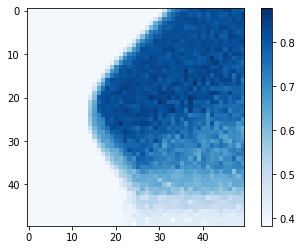

In [10]:
#Q2(b)
##model selection
# skf = StratifiedKFold(n_splits=5, shuffle=True)
para_gamma = np.logspace(-3, 3, num=50)
para_C = np.logspace(-3, 3, num=50)

ACC = np.zeros((50,50))  #store average accuracies p on the validation set
DEV = np.zeros((50,50))     #store the estimated standard deviation of accuracies

res = 1
for i,gamma in enumerate(para_gamma):
    for j,c in enumerate(para_C):
        model2 = SVC(C = c, gamma = gamma, kernel = 'rbf')
        acc = train_model(model2, feature2_train, label_train) 
        ACC[i,j] = np.mean(acc)
        DEV[i,j] = np.std(acc)
                            
plt.imshow(ACC, interpolation = 'nearest', cmap=plt.cm.Blues)
plt.colorbar()  

i, j = np.argwhere(ACC == np.max(ACC))[0]
print("the best gamma is " + str(para_gamma[i]))
print("the best C is " + str(para_C[j]))
print("the best accuracy is ")
print(ACC[i,j])               

In [11]:
##(C)
ACC = []
DEV = []
res = []
for k in range(9):
    list = []
    skf = StratifiedKFold(n_splits=5, shuffle=True)
    para_gamma = np.logspace(-3, 3, num=50)
    para_C = np.logspace(-3, 3, num=50)

    acc = np.zeros((50,50))  #store average accuracies p on the validation set
    dev = np.zeros((50,50))     #store the estimated standard deviation of accuracies

    for i,gamma in enumerate(para_gamma):
        for j,c in enumerate(para_C):
            model2 = SVC(C = c, gamma = gamma, kernel = 'rbf')
            accuracy = train_model(model2, feature2_train, label_train) 
            acc[i,j] = np.mean(accuracy)
            dev[i,j] = np.std(accuracy)

    #plt.imshow(ACC, interpolation = 'nearest', cmap=plt.cm.Blues)
    #plt.colorbar()  

    i, j = np.argwhere(acc == np.max(acc))[0]
    res.append((para_gamma[i], para_C[j]))
    
    print(acc[i,j])
    ACC.append(acc[i,j])
    DEV.append(dev[i,j])

print()
print(res)
print()
i = np.argwhere(ACC == np.max(ACC))[0]    
print("accuracy is " + str(ACC[int(i)]))
print("standard deviation is " + str(DEV[int(i)]))
print("i,j pair is " + str(res[int(i)]))


##(d) on all training set
gam_best = res[int(i)][0]
c_best = res[int(i)][1]
model = SVC(C=c_best, gamma=gam_best, kernel='rbf')
model.fit(feature_train, label_train)
s = model.predict(feature_test)      #predict  

acc = accuracy_score(label_test, s)   
print("training on test set the accuracy is " + str(acc))


0.8653594771241832
0.8660130718954248
0.8777777777777779
0.8653594771241832
0.866013071895425
0.8660130718954248
0.877124183006536
0.8653594771241832
0.8764705882352942

[(0.0517947467923121, 323.745754281764), (0.03906939937054617, 79.06043210907701), (0.09102981779915217, 10.985411419875572), (0.21209508879201905, 33.9322177189533), (0.029470517025518096, 59.636233165946365), (0.655128556859551, 8.286427728546842), (0.49417133613238334, 33.9322177189533), (0.09102981779915217, 79.06043210907701), (0.3727593720314938, 10.985411419875572)]

accuracy is 0.8777777777777779
standard deviation is 0.06478835438717
i,j pair is (0.09102981779915217, 10.985411419875572)
training on test set the accuracy is 0.4044943820224719


In [12]:
print(np.array(res))

[[5.17947468e-02 3.23745754e+02]
 [3.90693994e-02 7.90604321e+01]
 [9.10298178e-02 1.09854114e+01]
 [2.12095089e-01 3.39322177e+01]
 [2.94705170e-02 5.96362332e+01]
 [6.55128557e-01 8.28642773e+00]
 [4.94171336e-01 3.39322177e+01]
 [9.10298178e-02 7.90604321e+01]
 [3.72759372e-01 1.09854114e+01]]
